## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_df = pd.merge(mouse_metadata,study_results,on="Mouse ID")

# Display the data table for preview
study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_count = study_df["Mouse ID"].count()
mice_count

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = study_df.duplicated(subset=["Mouse ID","Timepoint"], keep=False)
duplicate_mice.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_df.drop_duplicates(subset=["Mouse ID","Timepoint"], keep='last',inplace=True,ignore_index=True)
study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_count = study_df["Mouse ID"].count()
mice_count

1888

In [7]:
drug = study_df["Drug Regimen"].value_counts()

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
# Assemble the resulting series into a single summary dataframe.
drug_regimen_mean = study_df.groupby(["Drug Regimen"])["Tumour Volume (mm3)"].mean()
drug_regimen_median = study_df.groupby(["Drug Regimen"])["Tumour Volume (mm3)"].median()
drug_regimen_variance = study_df.groupby(["Drug Regimen"])["Tumour Volume (mm3)"].agg('var')
drug_regimen_stdev = study_df.groupby(["Drug Regimen"])["Tumour Volume (mm3)"].agg('std')
drug_regimen_sem = study_df.groupby(["Drug Regimen"])["Tumour Volume (mm3)"].sem()

#Merge series and rename headers
summary = pd.merge(drug_regimen_mean,drug_regimen_median,how='left',on="Drug Regimen")
summary = summary.rename(columns={"Tumour Volume (mm3)_x":"Tumour Volume Mean",
                                 "Tumour Volume (mm3)_y":"Tumour Volume Median"})
summary = pd.merge(summary,drug_regimen_variance,how='left',on="Drug Regimen")
summary = summary.rename(columns={"Tumour Volume (mm3)":"Tumour Volume Variance"})
summary = pd.merge(summary,drug_regimen_stdev,how='left',on="Drug Regimen")
summary = summary.rename(columns={"Tumour Volume (mm3)":"Tumour Volume St Dev"})
summary = pd.merge(summary,drug_regimen_sem,how='left',on="Drug Regimen")
summary = summary.rename(columns={"Tumour Volume (mm3)":"Tumour Volume SEM"})
summary

,Tumour Volume Mean,Tumour Volume Median,Tumour Volume Variance,Tumour Volume St Dev,Tumour Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [63]:
# Using the aggregation method, produce the same summary statistics in a single line
summary.mean()

Tumour Volume Mean        50.982189
Tumour Volume Median      49.935849
Tumour Volume Variance    47.795259
Tumour Volume St Dev       6.816315
Tumour Volume SEM          0.500988
dtype: float64

## Bar and Pie Charts

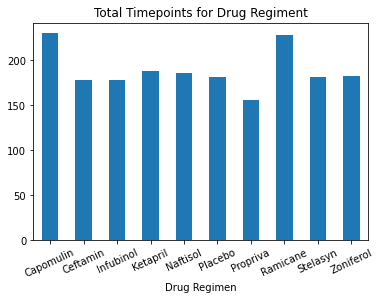

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
total_timepoint_per_drug = study_df.groupby(["Drug Regimen"])["Timepoint"].count()
total_timepoint_per_drug.plot.bar(x="Drug Regimen", y="Timepoint",title="Total Timepoints for Drug Regiment",rot=25);

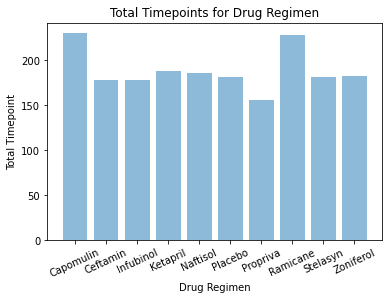

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_regimen = total_timepoint_per_drug.index.tolist()
timepoint = total_timepoint_per_drug.tolist()
plt.bar(drug_regimen, timepoint, alpha=0.5, align='center')
plt.title("Total Timepoints for Drug Regimen")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=25)
plt.ylabel("Total Timepoint");

<AxesSubplot:title={'center':'Distribution of Female vs Male Mice'}>

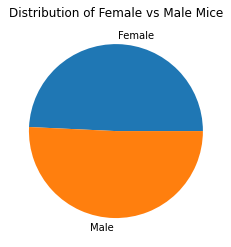

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex = study_df.groupby(["Sex"])["Mouse ID"].count()

mice_sex.plot.pie(title="Distribution of Female vs Male Mice",ylabel="")

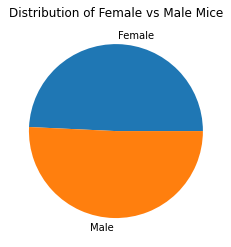

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = mice_sex.index.tolist()
plt.pie(mice_sex,labels=labels)
plt.title("Distribution of Female vs Male Mice");

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#Getting the last (greatest) timepoint for each mouse
last_timepoint = study_df.loc[(study_df["Drug Regimen"] == "Capomulin") |
                              (study_df["Drug Regimen"] == "Ramicane") | 
                              (study_df["Drug Regimen"] == "Infubinol") |
                             (study_df["Drug Regimen"] == "Ceftamin")]
last_timepoint = last_timepoint.drop_duplicates(subset=["Mouse ID"], keep='last',ignore_index=True)
last_timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimen_four = []
for x in last_timepoint["Drug Regimen"]:
    if x not in drug_regimen_four:
        drug_regimen_four.append(x)

# Create empty list to fill with tumour vol data (for plotting)
# Locate the rows which contain mice on each drug and get the tumour volumes
ramicane_tumour_volume = []
ramicane_last_timepoint = last_timepoint.loc[last_timepoint["Drug Regimen"] == "Ramicane"]
for x in ramicane_last_timepoint["Tumour Volume (mm3)"]:
       ramicane_tumour_volume.append(x)
        
capomulin_tumour_volume = []
capomulin_last_timepoint = last_timepoint.loc[last_timepoint["Drug Regimen"] == "Capomulin"]
for x in capomulin_last_timepoint["Tumour Volume (mm3)"]:
       capomulin_tumour_volume.append(x)

infubinol_tumour_volume = []
infubinol_last_timepoint = last_timepoint.loc[last_timepoint["Drug Regimen"] == "Infubinol"]
for x in infubinol_last_timepoint["Tumour Volume (mm3)"]:
       infubinol_tumour_volume.append(x)

ceftamin_tumour_volume = []
ceftamin_last_timepoint = last_timepoint.loc[last_timepoint["Drug Regimen"] == "Ceftamin"]
for x in ceftamin_last_timepoint["Tumour Volume (mm3)"]:
       ceftamin_tumour_volume.append(x)


# Calculate the IQR and quantitatively determine if there are any potential outliers for each drug 
lowerq_ramicane = ramicane_last_timepoint["Tumour Volume (mm3)"].quantile(.25)
upperq_ramicane = ramicane_last_timepoint["Tumour Volume (mm3)"].quantile(.75)
IQR_ramicane = round(upperq_ramicane-lowerq_ramicane,1)
lower_bound_ramicane = lowerq_ramicane - (1.5*IQR_ramicane)
upper_bound_ramicane = upperq_ramicane - (1.5*IQR_ramicane)
lowerq_capomulin = capomulin_last_timepoint["Tumour Volume (mm3)"].quantile(.25)
upperq_capomulin = capomulin_last_timepoint["Tumour Volume (mm3)"].quantile(.75)
IQR_capomulin = round(upperq_capomulin-lowerq_capomulin,1)
lower_bound_capomulin = lowerq_capomulin - (1.5*IQR_capomulin)
upper_bound_capomulin = upperq_capomulin - (1.5*IQR_capomulin)
lowerq_infubinol = infubinol_last_timepoint["Tumour Volume (mm3)"].quantile(.25)
upperq_infubinol = infubinol_last_timepoint["Tumour Volume (mm3)"].quantile(.75)
IQR_infubinol = round(upperq_infubinol-lowerq_infubinol,1)
lower_bound_infubinol = lowerq_infubinol - (1.5*IQR_infubinol)
upper_bound_infubinol = upperq_infubinol - (1.5*IQR_infubinol)
lowerq_ceftamin = ceftamin_last_timepoint["Tumour Volume (mm3)"].quantile(.25)
upperq_ceftamin = ceftamin_last_timepoint["Tumour Volume (mm3)"].quantile(.75)
IQR_ceftamin = round(upperq_ceftamin-lowerq_ceftamin,1)
lower_bound_ceftamin = lowerq_ceftamin - (1.5*IQR_ceftamin)
upper_bound_ceftamin = upperq_ceftamin - (1.5*IQR_ceftamin)


print(f"The interquartile range of Ramicane is {IQR_ramicane}")
print(f"Values below {lower_bound_ramicane} and above {upper_bound_ramicane} could be outliers")
print(f"The interquartile range of Capomulin is {IQR_capomulin}")
print(f"Values below {lower_bound_capomulin} and above {upper_bound_capomulin} could be outliers")
print(f"The interquartile range of Infubinol is {IQR_infubinol}")
print(f"Values below {lower_bound_infubinol} and above {upper_bound_infubinol} could be outliers")
print(f"The interquartile range of Ceftamin is {IQR_ceftamin}")
print(f"Values below {lower_bound_ceftamin} and above {upper_bound_ceftamin} could be outliers")

The interquartile range of Ramicane is 9.1
Values below 17.910469550000002 and above 27.00900627 could be outliers
The interquartile range of Capomulin is 7.8
Values below 20.677356839999998 and above 28.459220300000002 could be outliers
The interquartile range of Infubinol is 11.5
Values below 36.79860769 and above 48.27574285 could be outliers
The interquartile range of Ceftamin is 15.6
Values below 25.32207785 and above 40.89983003 could be outliers


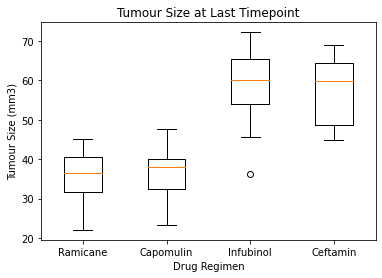

In [16]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest
data = [ramicane_tumour_volume, capomulin_tumour_volume, infubinol_tumour_volume, ceftamin_tumour_volume]

plt.boxplot(data)
plt.title("Tumour Size at Last Timepoint")
plt.ylabel("Tumour Size (mm3)")
plt.xlabel("Drug Regimen")
plt.xticks([1,2,3,4],drug_regimen_four);

## Line and Scatter Plots

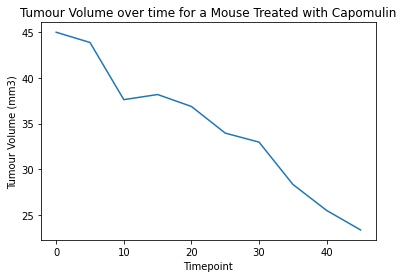

In [37]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin
capomulin_mouse = study_df.loc[study_df["Drug Regimen"] == "Capomulin"]
first_capomulin_mouse = capomulin_mouse.iat[0,0]
first_capomulin_mouse

y_axis = study_df.loc[study_df["Mouse ID"] == first_capomulin_mouse]["Tumour Volume (mm3)"]
x_axis = study_df.loc[study_df["Mouse ID"] == first_capomulin_mouse]["Timepoint"]

plt.plot(x_axis, y_axis)
plt.ylabel("Tumour Volume (mm3)")
plt.xlabel("Timepoint")
plt.title("Tumour Volume over time for a Mouse Treated with Capomulin");

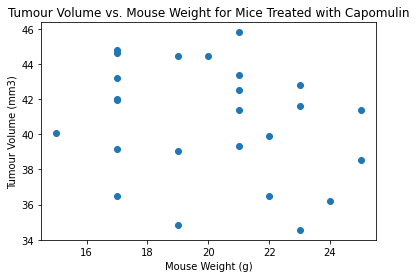

In [62]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen

capomulin_mouse_weight = last_timepoint.loc[last_timepoint["Drug Regimen"] == "Capomulin"]["Weight (g)"]
capomulin_mouse_tumour_volume = study_df.loc[study_df["Drug Regimen"] == "Capomulin"]
capomulin_mouse_tumour_volume = capomulin_mouse_tumour_volume.groupby("Mouse ID")["Tumour Volume (mm3)"].mean()

plt.scatter(capomulin_mouse_weight,capomulin_mouse_tumour_volume)
plt.ylabel("Tumour Volume (mm3)")
plt.xlabel("Mouse Weight (g)")
plt.title("Tumour Volume vs. Mouse Weight for Mice Treated with Capomulin");

## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen
